model_type argument is not used in v4.0.1+. Ignoring this argument...
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


--- Validating Default 'nuclei' Model on Curated Training Images ---


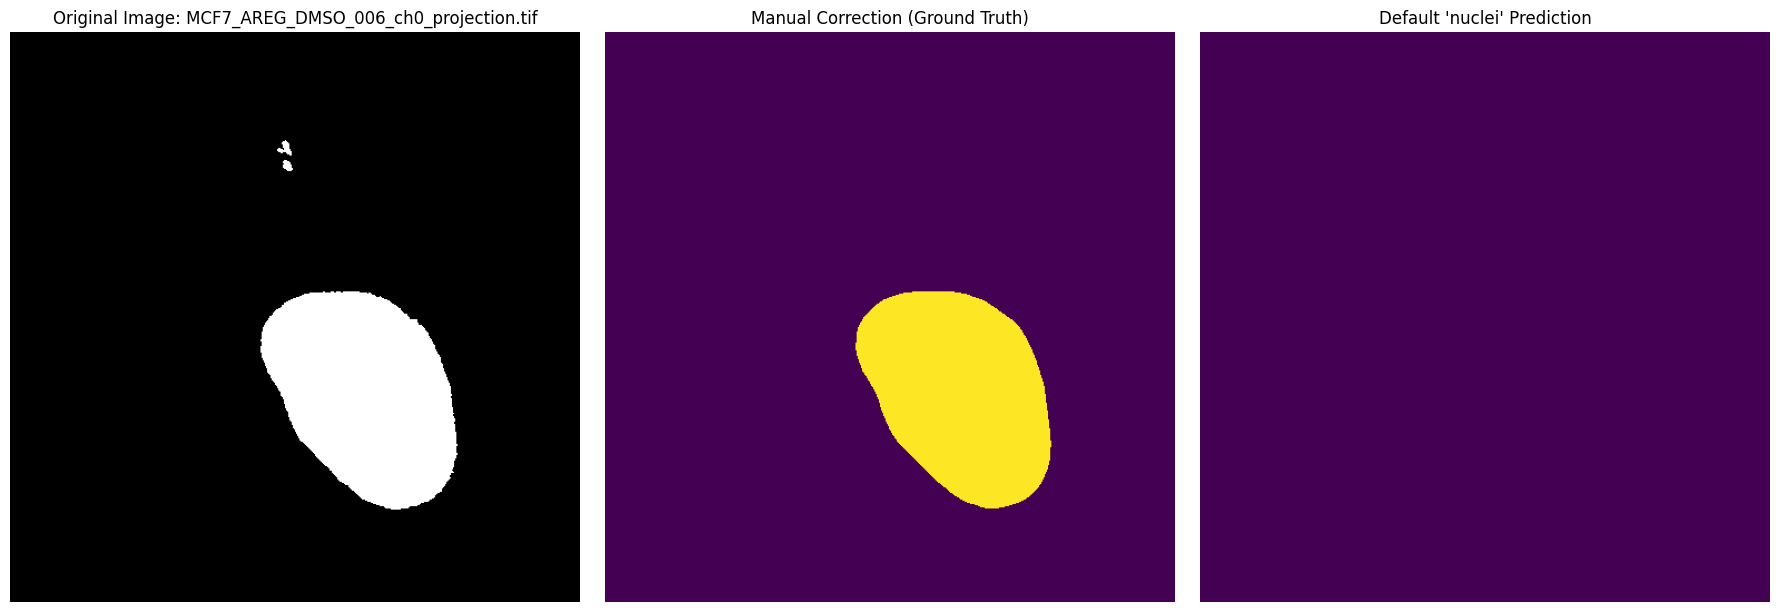

channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


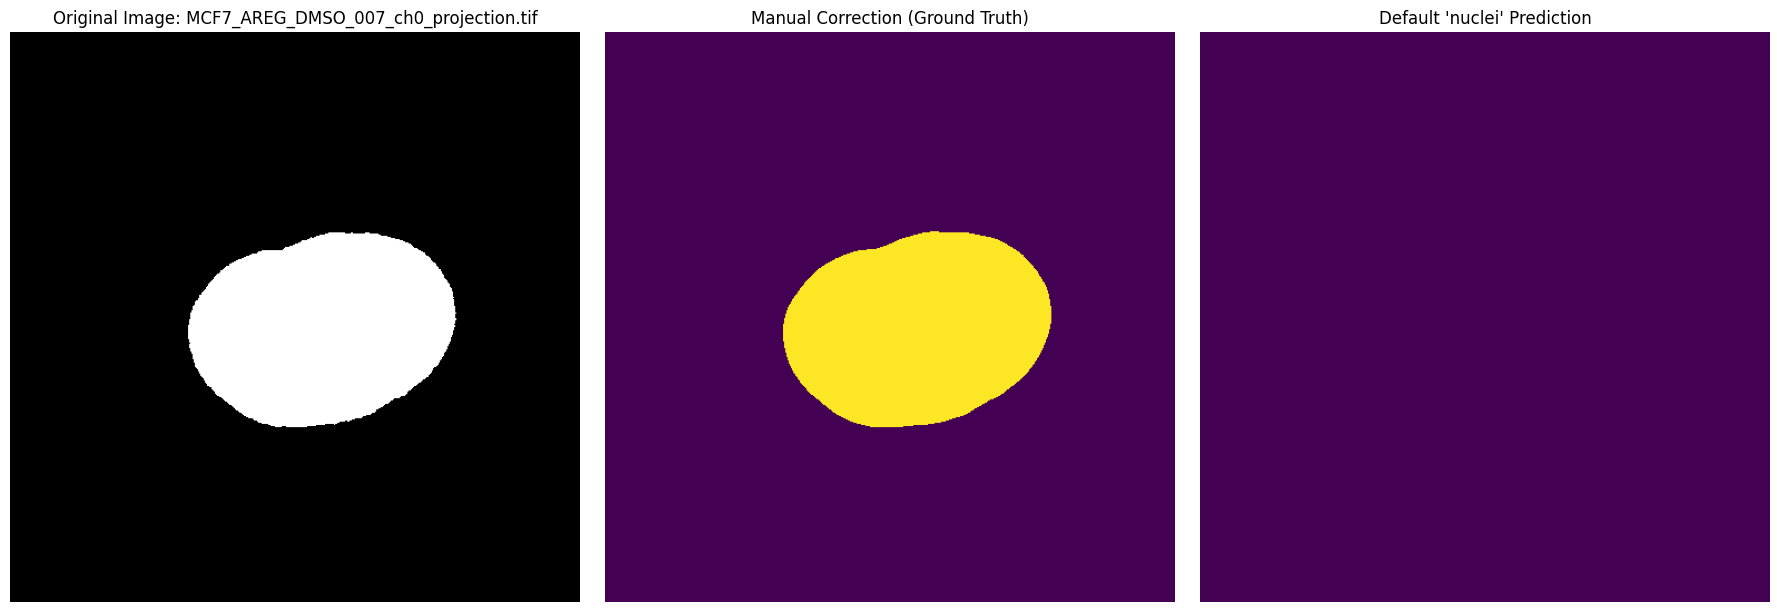

channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


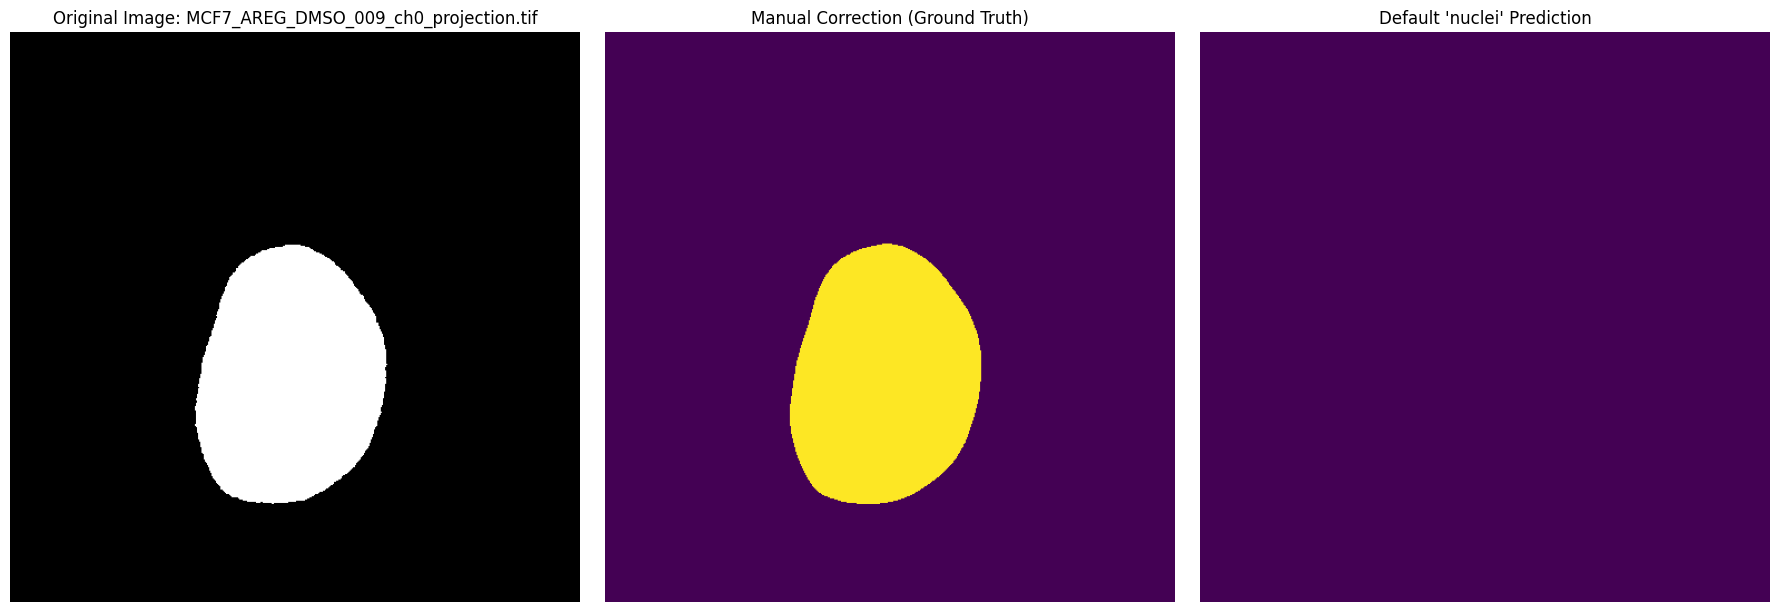

In [4]:
import os
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from cellpose import models

BASE_DIR = ".."
TRAINING_DIR = os.path.join(BASE_DIR, "data", "training")

img_dir = os.path.join(TRAINING_DIR, "images", "nucleus_binary")
lbl_dir = os.path.join(TRAINING_DIR, "labels", "nucleus")

image_files = sorted([f for f in os.listdir(img_dir) if f.endswith('_projection.tif')])

model = models.CellposeModel(gpu=True, model_type='nuclei')

print("--- Validating Default 'nuclei' Model on Curated Training Images ---")
for i in range(min(3, len(image_files))):
    filename = image_files[i]
    
    try:
        img = tifffile.imread(os.path.join(img_dir, filename))
        ground_truth_mask = tifffile.imread(os.path.join(lbl_dir, filename))
        
        predicted_mask, _, _ = model.eval(img, channels=[0,0], diameter=None)
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title(f"Original Image: {filename}")
        axes[0].axis('off')

        axes[1].imshow(ground_truth_mask, cmap='viridis')
        axes[1].set_title("Manual Correction (Ground Truth)")
        axes[1].axis('off')

        axes[2].imshow(predicted_mask, cmap='viridis')
        axes[2].set_title("Default 'nuclei' Prediction")
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Could not find a matching label for image '{filename}'. Skipping.")
    except Exception as e:
        print(f"An error occurred with {filename}: {e}")